## Classification of active municipalities

In [24]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import ydata_profiling
from ydata_profiling import ProfileReport
import seaborn as sns
import numpy as np

In [15]:
df = pd.read_csv("../data/interim/twitter_weather_electrical.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
df = gpd.GeoDataFrame(df).set_crs('EPSG:4326')
df['hour_blocks'] = df['time'].str.split(':').str[0].astype(int)

In [16]:
df = df.drop(['user', 'language', 'geometry_y'], axis=1)

Calculate hour categories

In [17]:
def categorize_hour(hour):
    if 2 <= hour < 8:
        return 'A'  # 2-7
    elif 8 <= hour < 14:
        return 'B'  # 8-13
    elif 14 <= hour < 20:
        return 'C'  # 14-19
    elif (20 <= hour <= 23) or (0 <= hour <= 1):  # 20-23 or 00-01
        return 'D'
    else:
        return None  # Fallback in case something doesn't match

# Apply the function to create the hour_category
df['hour_category'] = df['hour_blocks'].apply(categorize_hour)

In [18]:
df

,date,time,timestamp_x,municipality.name,hour_blocks,geometry,station,elevation,timestamp_y,minTemperature,...,precipitation,minWind,maxWind,temperature,wind,cellId,tot_curr_cell,NR_SITES,curr_site,hour_category
0,2013-11-01,00:04,1383260656,Trento,0,POINT (11.13000 46.07000),T0129,312,1383260400,11.7,...,0.0,0.2,2.0,13.2,1@47,5201,90.971940,1288.0,0.070630,D
1,2013-11-01,00:01,1383260474,Pinzolo,0,POINT (10.83000 46.23000),T0071,905,1383260400,4.5,...,0.0,0.0,2.5,8.4,0.1@205,7167,1.784586,24.0,0.074358,D
2,2013-11-01,00:43,1383262983,Cavalese,0,POINT (11.46000 46.29000),T0367,958,1383260400,7.0,...,0.0,0.0,1.8,8.8,NaN,8151,0.000000,0.0,0.000000,D
3,2013-11-01,00:38,1383262717,Rovereto,0,POINT (11.04000 45.89000),T0147,203,1383260400,11.0,...,0.0,0.2,1.9,13.2,0.6@7,2855,47.591226,995.0,0.047830,D
4,2013-11-01,00:45,1383263140,San Michele all'Adige,0,POINT (11.12000 46.20000),T0408,204,1383260400,9.6,...,0.0,NaN,NaN,11.6,NaN,6838,0.100372,4.0,0.025093,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,Vigo di Fassa,0,POINT (11.68000 46.42000),T0096,1205,1388444400,-10.0,...,0.0,NaN,NaN,-7.8,NaN,9922,0.000000,0.0,0.000000,D
27932,2013-12-29,13:12,1388319166,Predazzo,13,POINT (11.60000 46.31000),T0389,1000,1388271600,0.4,...,0.0,NaN,NaN,3.4,NaN,8513,0.000000,0.0,0.000000,B
27933,2013-11-19,00:51,1384818699,Sant'Orsola Terme,0,POINT (11.30000 46.11000),T0139,925,1384815600,4.3,...,0.0,NaN,NaN,4.8,NaN,5799,0.000000,0.0,0.000000,D
27934,2013-11-23,09:49,1385196576,Sant'Orsola Terme,9,POINT (11.30000 46.11000),T0139,925,1385161200,-1.6,...,0.0,NaN,NaN,0.8,NaN,5799,0.000000,0.0,0.000000,B


In [19]:
df_grouped = df.groupby(['date', 'municipality.name', 'hour_category']).agg({
    'temperature':'mean',
    'minTemperature':'mean',
    'maxTemperature':'mean',
    'precipitation':'mean',
    'timestamp_x': 'count' 
}).rename(columns={'timestamp_x': 'tweet_count'}).reset_index()

In [20]:
df_grouped

,date,municipality.name,hour_category,temperature,minTemperature,maxTemperature,precipitation,tweet_count
0,2013-11-01,Andalo,A,9.200000,8.5,12.000000,0.0,1
1,2013-11-01,Baselga di Pinè,B,11.533333,8.0,13.733333,0.0,3
2,2013-11-01,Baselga di Pinè,C,11.433333,7.3,12.966667,0.0,3
3,2013-11-01,Baselga di Pinè,D,9.350000,6.6,12.200000,0.0,2
4,2013-11-01,Bedollo,B,14.120000,8.7,14.500000,0.0,5
...,...,...,...,...,...,...,...,...
5026,2013-12-31,Vigo di Fassa,B,-7.450000,-10.0,0.300000,0.0,4
5027,2013-12-31,Vigo di Fassa,C,-3.966667,-10.0,0.300000,0.0,3
5028,2013-12-31,Vigo di Fassa,D,-8.125000,-10.0,0.300000,0.0,4
5029,2013-12-31,Villa Agnedo,C,0.533333,-3.3,4.900000,0.0,3


In [27]:
conditions = [
    (df_grouped['tweet_count'] >= df_grouped['tweet_count'].quantile(0.9)),  # Top 10%
    (df_grouped['tweet_count'] < df_grouped['tweet_count'].quantile(0.9)) & 
    (df_grouped['tweet_count'] >= df_grouped['tweet_count'].quantile(0.5)),  # Middle 40%
    (df_grouped['tweet_count'] < df_grouped['tweet_count'].quantile(0.5))    # Bottom 50%
]

In [29]:
choices = ['High', 'Medium', 'Low']
df_grouped['class'] = np.select(conditions, choices, default='Low')

In [30]:
df_grouped

,date,municipality.name,hour_category,temperature,minTemperature,maxTemperature,precipitation,tweet_count,class
0,2013-11-01,Andalo,A,9.200000,8.5,12.000000,0.0,1,Low
1,2013-11-01,Baselga di Pinè,B,11.533333,8.0,13.733333,0.0,3,Medium
2,2013-11-01,Baselga di Pinè,C,11.433333,7.3,12.966667,0.0,3,Medium
3,2013-11-01,Baselga di Pinè,D,9.350000,6.6,12.200000,0.0,2,Medium
4,2013-11-01,Bedollo,B,14.120000,8.7,14.500000,0.0,5,Medium
...,...,...,...,...,...,...,...,...,...
5026,2013-12-31,Vigo di Fassa,B,-7.450000,-10.0,0.300000,0.0,4,Medium
5027,2013-12-31,Vigo di Fassa,C,-3.966667,-10.0,0.300000,0.0,3,Medium
5028,2013-12-31,Vigo di Fassa,D,-8.125000,-10.0,0.300000,0.0,4,Medium
5029,2013-12-31,Villa Agnedo,C,0.533333,-3.3,4.900000,0.0,3,Medium


In [35]:
#df_grouped[(df_grouped['municipality.name'] == 'Trento') & (df_grouped['class'] == 'High')]

Remove last day :C

In [37]:
day_to_predict = '2013-12-31'

In [41]:
data = df_grouped[df_grouped['date'] != day_to_predict]

In [74]:
data

,date,municipality.name,hour_category,temperature,minTemperature,maxTemperature,precipitation,tweet_count,class
0,2013-11-01,Andalo,A,9.200000,8.5,12.000000,0.0,1,Low
1,2013-11-01,Baselga di Pinè,B,11.533333,8.0,13.733333,0.0,3,Medium
2,2013-11-01,Baselga di Pinè,C,11.433333,7.3,12.966667,0.0,3,Medium
3,2013-11-01,Baselga di Pinè,D,9.350000,6.6,12.200000,0.0,2,Medium
4,2013-11-01,Bedollo,B,14.120000,8.7,14.500000,0.0,5,Medium
...,...,...,...,...,...,...,...,...,...
4867,2013-12-30,Volano,B,3.600000,0.5,8.100000,0.0,1,Low
4868,2013-12-30,Volano,C,3.500000,0.5,8.100000,0.0,1,Low
4869,2013-12-30,Zambana,D,0.400000,0.1,8.800000,0.0,1,Low
4870,2013-12-30,Ziano di Fiemme,C,-1.100000,-3.7,2.400000,0.0,1,Low


Divide between features and target

In [77]:
X = data[['date', 
          'municipality.name', 
          'hour_category', 
          'temperature', 
          'minTemperature', 
          'maxTemperature', 
          'precipitation', 
          'tweet_count' 
]]
y = data['class']  # Target is the multi-class label (High, Medium, Low)

In [78]:
y

0          Low
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
4867       Low
4868       Low
4869       Low
4870       Low
4871    Medium
Name: class, Length: 4872, dtype: object

## Random forest let's go

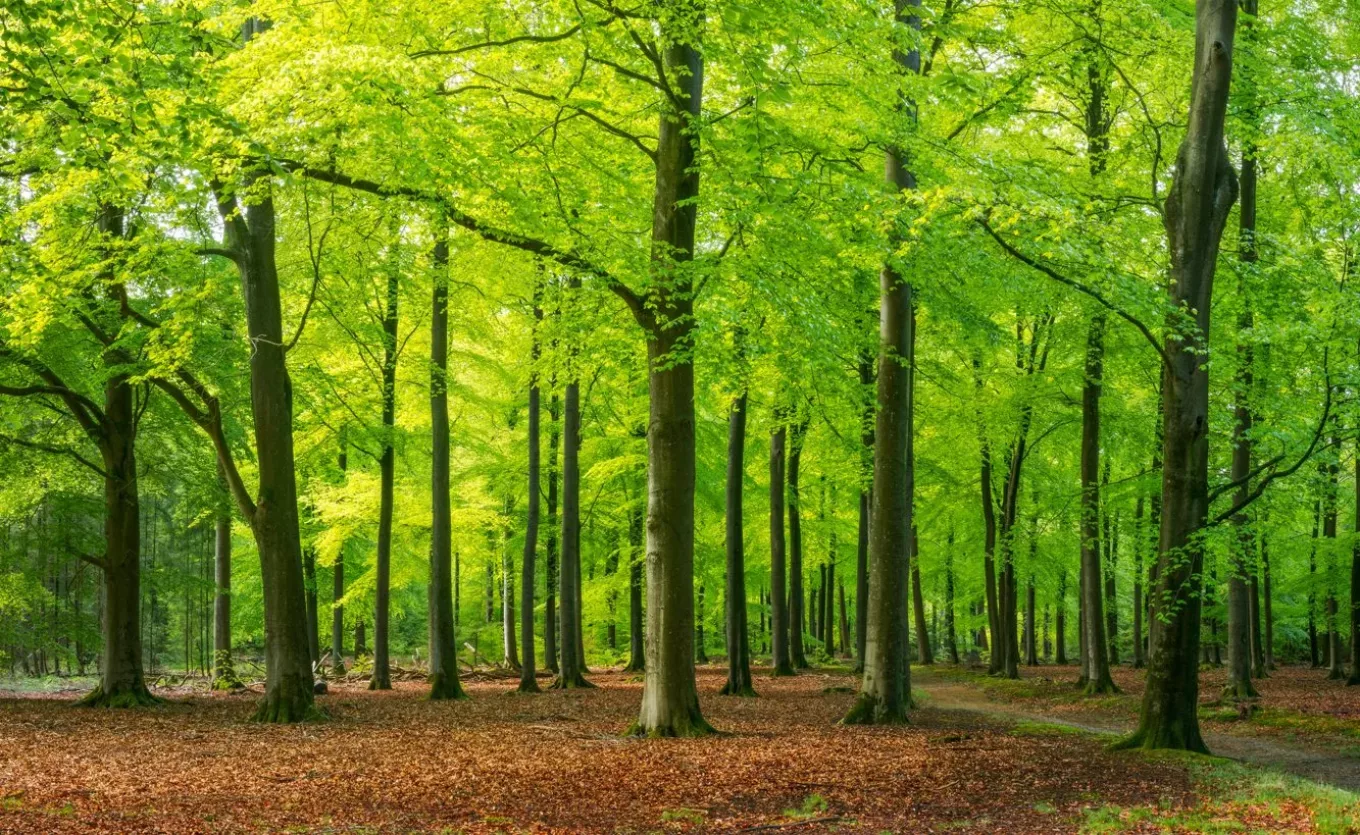

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [122]:
# Separate categorical features
categorical_features = ['date', 'municipality.name', 'hour_category']  # Any string or categorical features
numerical_features = ['temperature', 'minTemperature', 'maxTemperature', 'precipitation', 'tweet_count']

In [123]:
# Encode categorical features
le = LabelEncoder()
for feat in categorical_features:
    X[feat] = le.fit_transform(X[feat])

In [124]:
X[categorical_features]

,date,municipality.name,hour_category
0,0,4,0
1,0,6,1
2,0,6,2
3,0,6,3
4,0,7,1
...,...,...,...
4867,59,155,1
4868,59,155,2
4869,59,156,3
4870,59,157,2


In [125]:
# Scale the numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_features])

In [126]:
# Convert the scaled numerical features back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

In [127]:
# Combine the scaled numerical features and encoded categorical features
X = pd.concat([scaled_numerical_df, X[categorical_features].astype('category')], axis=1)

In [128]:
X.dtypes
# it is possible to separate month and day from date

temperature           float64
minTemperature        float64
maxTemperature        float64
precipitation         float64
tweet_count           float64
date                 category
municipality.name    category
hour_category        category
dtype: object

In [129]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
y_test

1335       Low
1101       Low
4215       Low
2764       Low
1338    Medium
         ...  
4860      High
4278       Low
680     Medium
829     Medium
1543       Low
Name: class, Length: 975, dtype: object

In [143]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

In [144]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [145]:
# Predict on test data
y_pred = rf_classifier.predict(X_test)

In [146]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9517948717948718
              precision    recall  f1-score   support

        High       1.00      0.53      0.70       101
         Low       1.00      1.00      1.00       436
      Medium       0.90      1.00      0.95       438

    accuracy                           0.95       975
   macro avg       0.97      0.84      0.88       975
weighted avg       0.96      0.95      0.95       975



In [118]:
%pprint ON

Pretty printing has been turned ON


In [151]:
fpr, tpr, thresholds = roc_curve?

Signature:
roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array-like of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int, float, bool or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (